# House Price Prediction

## Project ID: PRCP-1020-HousePricePred

## Domain: Real Estate Analytics

This project uses the **Ames Housing Dataset**, which contains 79 explanatory variables describing almost every aspect of residential houses in Ames, Iowa.  
The objective is to analyze these features, understand their relationship with house prices, and build robust machine learning models to predict the final sale price of a house.

The project aims to address the following tasks:

- Perform a complete exploratory data analysis (EDA) to understand the dataset and key factors influencing house prices.
- Build a robust machine learning model to accurately predict the sale price of houses based on various features.
- Analyze the relationship between house features and price variations.
- Provide actionable suggestions to customers for buying houses based on area, price, and other requirements.
- Compare the performance of multiple models and identify the best model for production use.

The dataset used in this project is the **Ames Housing Dataset**, which consists of residential home sales data from Ames, Iowa.

- Number of observations: 1,460
- Number of columns: 81
- Number of explanatory features: 79
- Target variable: `SalePrice`

The dataset includes a mixture of numerical, categorical, and ordinal variables covering:
- Property size and layout
- Construction quality and condition
- Location and neighborhood information
- Basement, garage, and outdoor features
- Sale timing and conditions

This rich and complex dataset makes it well-suited for advanced regression and feature engineering techniques.

In [1]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# plot style
sns.set(style="whitegrid")

# Display all columns
pd.set_option("display.max_columns", None)

# plot size
plt.rcParams["figure.figsize"] = (10, 6)

# Data Description

In [3]:
df= pd.read_csv('data.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Drop ID column
df.drop("Id", axis=1, inplace=True)

In [10]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [11]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [12]:
# Basement categorical features
basement_cat = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2'
]
for col in basement_cat:
    df[col].fillna('None', inplace=True)

# Basement numerical features
basement_num = [
    'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF'
]
for col in basement_num:
    df[col].fillna(0, inplace=True)

In [13]:
# Garage categorical features
garage_cat = [
    'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond'
]
for col in garage_cat:
    df[col].fillna('None', inplace=True)

# Garage numerical features
garage_num = ['GarageCars', 'GarageArea']
for col in garage_num:
    df[col].fillna(0, inplace=True)

# Garage year built (true missing / absence mix)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [14]:
df['Alley'].fillna('None', inplace=True)
df['PoolQC'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)

In [15]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

In [16]:
df['MasVnrType'].fillna('None', inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [17]:
df.isnull().sum().max()

0

##  Missing Value Handling

Missing values were handled based on their underlying meaning.  
Features where missing values indicated the **absence of a property attribute** (such as no basement, no garage, or no pool) were filled with `"None"` for categorical variables and `0` for numerical area or count variables.  

True missing values were imputed using the **median** for numerical features and the **mode** for categorical features to preserve the overall data distribution and reduce sensitivity to outliers.  

After imputation, the dataset contains no missing values.

# Exploratory Data Analysis

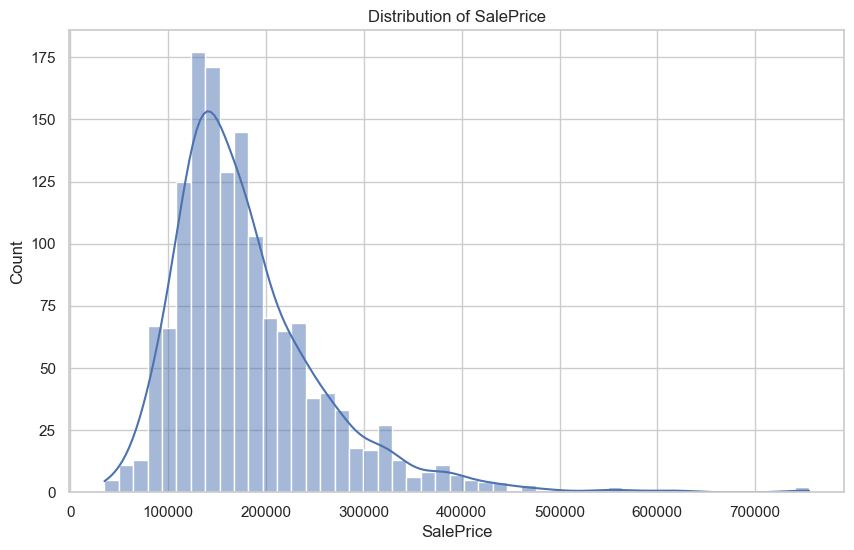

In [18]:
# Distribution of SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

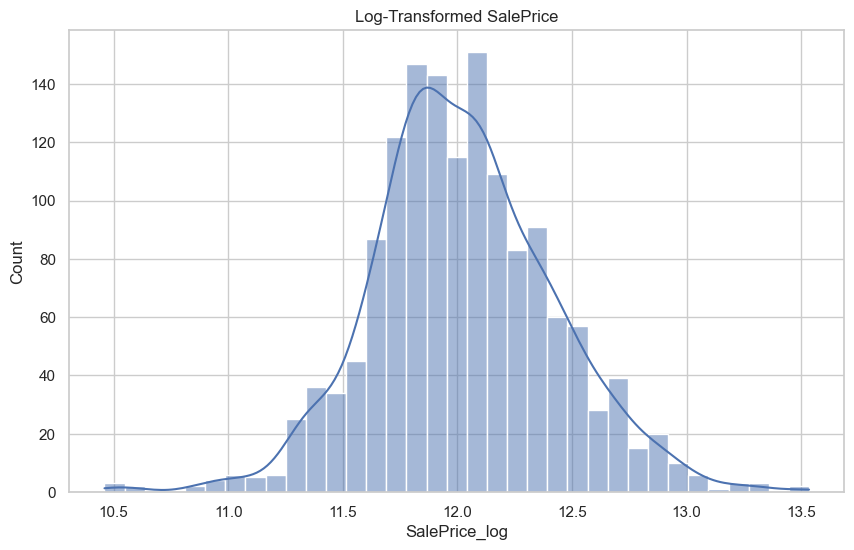

In [19]:
# Log transform SalePrice
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# Plot transformed target
sns.histplot(df['SalePrice_log'], kde=True)
plt.title("Log-Transformed SalePrice")
plt.show()

### Log Transformation of SalePrice

The original `SalePrice` distribution was highly right-skewed, meaning most houses were priced in the lower range, with a few very expensive houses creating a long tail. 
Such skewness can negatively affect regression models by giving too much importance to extreme values.

To handle this, the `SalePrice` was log-transformed using `log1p`. 
This transformation reduces the impact of very high prices, makes the distribution more balanced, and helps the model learn relationships more effectively.

Using the log scale also allows the model to focus on relative price differences rather than absolute differences, which is more realistic for house price prediction. 
Overall, log transformation improves model stability and prediction performance.

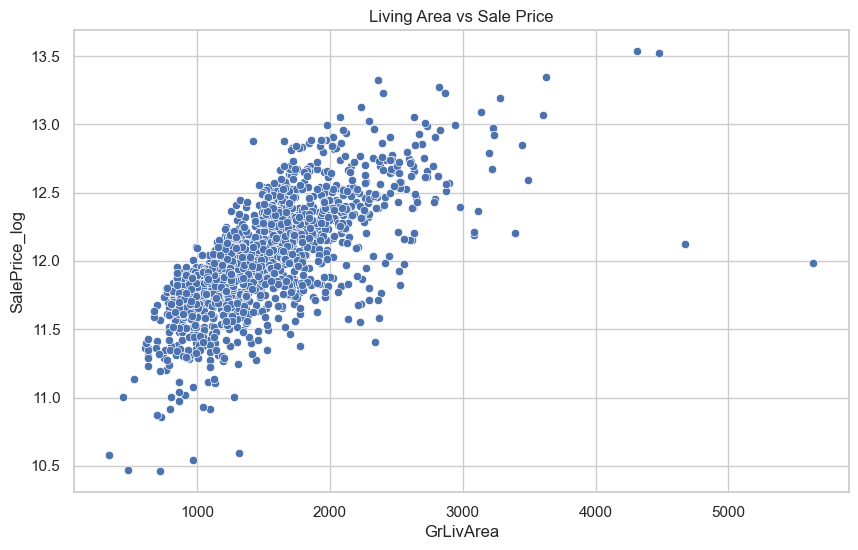

In [20]:
sns.scatterplot(x='GrLivArea', y='SalePrice_log', data=df)
plt.title("Living Area vs Sale Price")
plt.show()

The scatter plot shows a clear positive relationship between the above-ground living area and the sale price of a house. 
In most cases, houses with a larger living area tend to sell at higher prices.
Although a few large houses sell at comparatively lower prices, the overall trend indicates that living area is a strong factor influencing house prices.

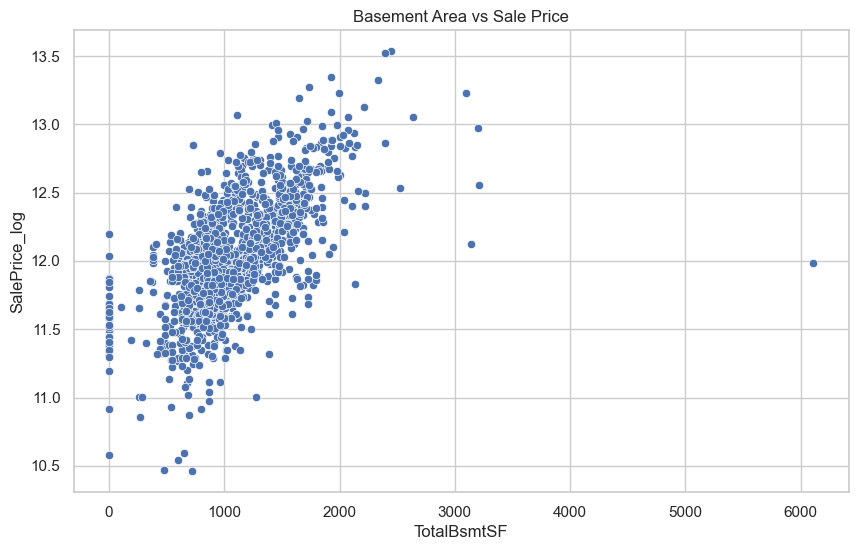

In [21]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice_log', data=df)
plt.title("Basement Area vs Sale Price")
plt.show()

The scatter plot indicates a positive relationship between basement area and sale price, where houses with smaller basement sizes are generally clustered at lower price ranges. 
This suggests that having a larger basement usually adds value to a house.
However, the plot also shows that some houses with relatively smaller basement areas still achieve higher sale prices. 
This implies that basement size alone does not determine the price, and other factors such as overall quality, location, and living area also play an important role.

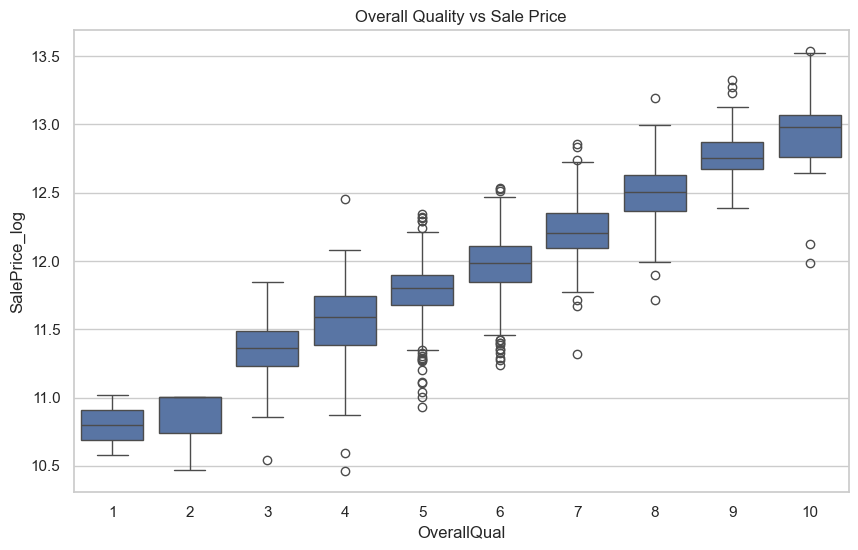

In [22]:
sns.boxplot(x='OverallQual', y='SalePrice_log', data=df)
plt.title("Overall Quality vs Sale Price")
plt.show()

The box plot shows a strong positive relationship between overall house quality and sale price. 
As the quality rating increases, the sale price also increases consistently.
Up to a quality rating of 7, there is some overlap between the price distributions, indicating similar price ranges across these categories. 
However, for higher quality ratings (8 and 9), the box plots show little to no overlap with lower quality levels. 
This indicates a clear price premium for high-quality houses, where improvements in quality beyond a certain level result in significantly higher prices.

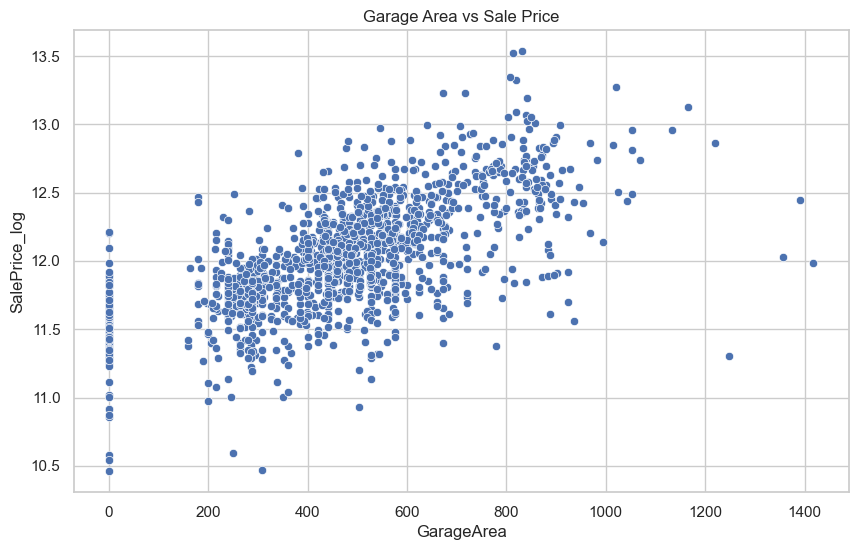

In [23]:
sns.scatterplot(x='GarageArea', y='SalePrice_log', data=df)
plt.title("Garage Area vs Sale Price")
plt.show()

The scatter plot shows that houses with no garage (garage area equal to 0) are mostly associated with lower to medium sale prices. 
As the garage area increases, the sale price of houses generally increases, indicating that the presence and size of a garage add value to a property.
The plot also suggests diminishing returns at higher garage areas, where very large garages do not always lead to proportionally higher prices. 
This indicates that while having a garage is important, extremely large garages may not significantly increase the sale price beyond a certain point.

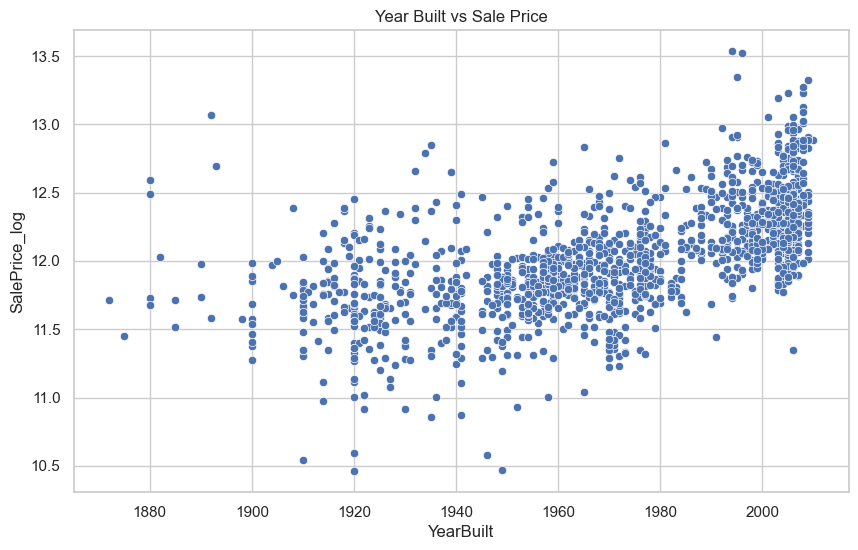

In [24]:
sns.scatterplot(x='YearBuilt', y='SalePrice_log', data=df)
plt.title("Year Built vs Sale Price")
plt.show()

The scatter plot indicates a general upward trend between the year a house was built and its sale price, suggesting that newer houses tend to sell at higher prices. 
However, the relationship is not very steep, and there is considerable spread in prices for houses built in similar years.
This suggests that while newer construction contributes to higher sale prices, year built alone is not a strong predictor. 
Other factors such as overall quality, size, renovations, and location also play a significant role in determining the final sale price.

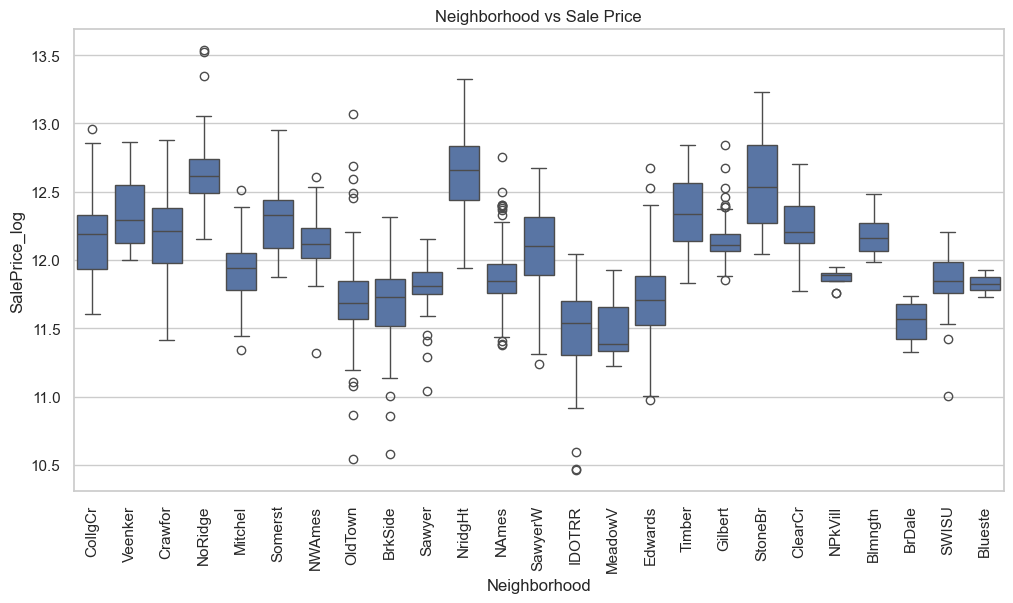

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice_log', data=df)
plt.xticks(rotation=90)
plt.title("Neighborhood vs Sale Price")
plt.show()

The box plot shows noticeable differences in sale prices across various neighborhoods. 
Some neighborhoods consistently have higher house prices, while others are associated with lower price ranges.
This indicates that neighborhood plays an important role in determining house prices. 
Location-related factors such as accessibility, surroundings, and overall desirability of the area significantly influence how much buyers are willing to pay.

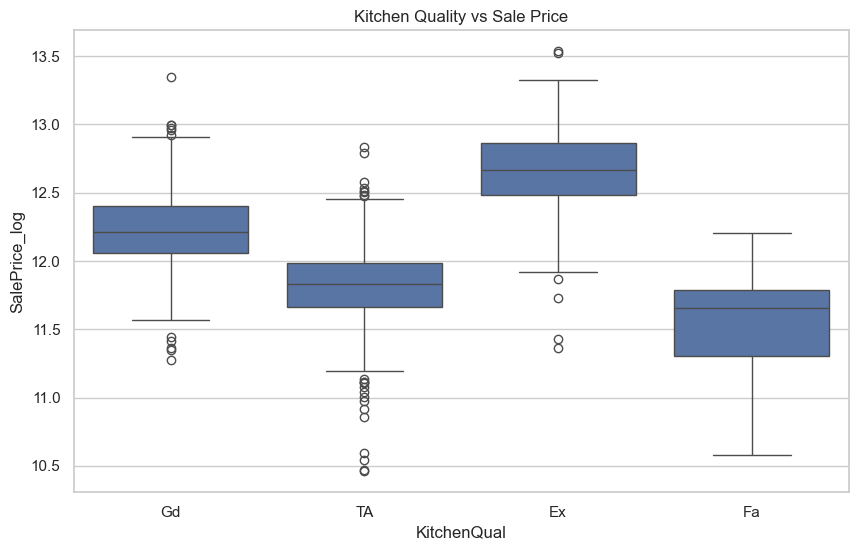

In [26]:
sns.boxplot(x='KitchenQual', y='SalePrice_log', data=df)
plt.title("Kitchen Quality vs Sale Price")
plt.show()

The box plot shows a clear increasing trend between kitchen quality and sale price. 
As the quality of the kitchen improves from poor and average levels to good and excellent, the sale price of the house also increases.
This indicates that kitchen quality is an important factor influencing house prices, as buyers tend to value better-quality and well-finished kitchens.

In [27]:
# Correlation with target
corr = df.corr(numeric_only=True)['SalePrice_log'].sort_values(ascending=False)
corr.head(10)

SalePrice_log    1.000000
SalePrice        0.948374
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
Name: SalePrice_log, dtype: float64

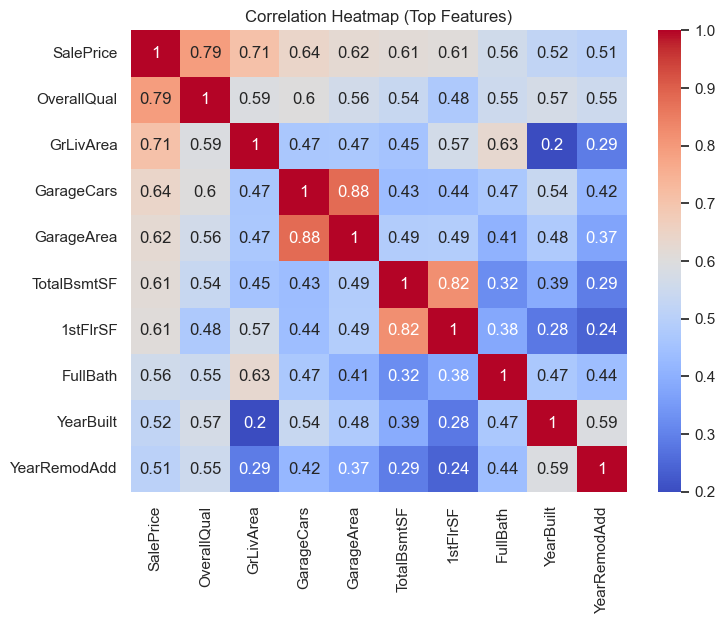

In [28]:
top_corr_features = corr[1:11].index

plt.figure(figsize=(8,6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top Features)")
plt.show()

The correlation heatmap was used to understand the relationships between numerical features and the sale price of houses. 
It highlights that features related to house size and quality, such as overall quality, living area, basement area, and garage features, have strong positive correlations with the sale price.

The heatmap also shows high correlation among certain features themselves, for example between `GarageArea` and `GarageCars`. 
This indicates that these variables capture similar information related to garage size and capacity. 
Such correlations were noted but not removed, as the tree-based models used in this project can effectively handle correlated features.

Overall, the heatmap supports the insights obtained from the exploratory data analysis and helps in confirming the most influential numerical features for house price prediction.


## EDA Summary

Exploratory Data Analysis was performed to understand the distribution of house prices and identify the key factors influencing them. 
The target variable, `SalePrice`, was found to be right-skewed, and a logarithmic transformation was applied to reduce skewness and improve model performance.

Analysis of numerical features showed that house size-related variables such as above-ground living area, basement area, and total square footage have a strong positive relationship with sale price. 
Quality-related features, especially overall quality and kitchen quality, also demonstrated a clear increasing trend with house prices.

Categorical analysis revealed that neighborhood plays a significant role in price variation, with certain neighborhoods consistently commanding higher prices than others. 
Garage-related features showed that the presence and size of a garage generally increase house value, although very large garages do not always lead to proportional price increases.

Correlation analysis supported the EDA findings by highlighting strong relationships between sale price and size, quality, and garage features, while also revealing correlations among related features such as garage area and garage capacity. 
Overall, the EDA confirmed that house prices are influenced by a combination of size, quality, location, and available amenities rather than any single factor.

# Feature Engineering & Encoding

New features were created to better represent house characteristics and improve model performance.

In [29]:
# Age of the house at the time of sale
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# Years since last renovation
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

# Total square footage
df['TotalSF'] = (
    df['1stFlrSF'] +
    df['2ndFlrSF'] +
    df['TotalBsmtSF']
)

In [30]:
# Defining ordinal mapping
quality_map = {
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

# Applying mapping
ordinal_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'HeatingQC', 'KitchenQual', 'FireplaceQu',
    'GarageQual', 'GarageCond'
]

for col in ordinal_cols:
    df[col] = df[col].map(quality_map)

In [31]:
# Target varible
X = df.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = df['SalePrice_log']

In [32]:
# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

In [33]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

## Summary

Feature engineering was performed to enhance the predictive power of the dataset and better represent real-world house characteristics. 
New features such as house age, years since last renovation, and total square footage were created to capture information that is more meaningful to buyers than raw year or area values.

Ordinal features representing quality and condition were encoded using ordered numerical mappings to preserve their inherent ranking. 
This allowed the models to effectively learn the increasing impact of quality-related attributes on house prices.

Nominal categorical variables were converted into numerical format using one-hot encoding, while avoiding multicollinearity by dropping the first category. 
Overall, these steps ensured that the dataset was fully numerical, well-structured, and suitable for machine learning models without losing important information.

# Model Building

In [34]:
# defining evaluation function
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name}")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")
    print("-" * 40)

In [35]:
# linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
evaluate_model("Linear Regression", y_test, y_pred_lr)

Linear Regression
MAE : 0.0933
RMSE: 0.1547
R²  : 0.8718
----------------------------------------


In [36]:
# Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model("Random Forest (Baseline)", y_test, y_pred_rf)

Random Forest (Baseline)
MAE : 0.0967
RMSE: 0.1472
R²  : 0.8839
----------------------------------------


In [37]:
# Gradient Boosting Regression model
gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

evaluate_model("Gradient Boosting (Baseline)", y_test, y_pred_gbr)

Gradient Boosting (Baseline)
MAE : 0.0905
RMSE: 0.1391
R²  : 0.8964
----------------------------------------


### Baseline Model Performance Comparison

The performance of three regression models was evaluated using MAE, RMSE, and R² score. 
Linear Regression served as a baseline model and showed reasonable performance but was limited by its linear assumptions. 
Random Forest improved the R² score but did not reduce the average prediction error significantly.

Gradient Boosting Regressor achieved the lowest MAE and RMSE along with the highest R² score, indicating superior predictive performance. 
Based on these results, Gradient Boosting was selected as the best-performing baseline model and chosen for further optimization using hyperparameter tuning.

# Hyperparameter Tuning

In [38]:
# Defining parameter grid
param_grid = {
    'n_estimators': [150, 250],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

In [39]:
# Applying GridSearchCV
gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 250]},
             scoring='neg_mean_squared_error', verbose=1)

In [40]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [41]:
best_gbr = grid_search.best_estimator_

y_pred_gbr_tuned = best_gbr.predict(X_test)

evaluate_model("Gradient Boosting (Tuned)", y_test, y_pred_gbr_tuned)

Gradient Boosting (Tuned)
MAE : 0.0896
RMSE: 0.1369
R²  : 0.8995
----------------------------------------


## Hyperparameter Tuning Results

Gradient Boosting Regressor was optimized using GridSearchCV to identify the best combination of hyperparameters. 
The tuned model achieved improved performance compared to the baseline version, with lower MAE and RMSE values and a higher R² score.

These results indicate that hyperparameter tuning helped the model generalize better by controlling learning rate and model complexity. 
Based on this improvement, the tuned Gradient Boosting model was selected as the final model for house price prediction.

# Feature Importance & Relationship Analysis

In [42]:
# Extract feature importance from tuned model
feature_importance = pd.Series(
    best_gbr.feature_importances_,
    index=X_train.columns
)

# Sort values
feature_importance = feature_importance.sort_values(ascending=False)

# Display top 15 features
feature_importance.head(15)

TotalSF         0.384683
OverallQual     0.325456
KitchenQual     0.025992
GrLivArea       0.023739
GarageCars      0.021369
BsmtQual        0.020724
LotArea         0.016325
FireplaceQu     0.015330
OverallCond     0.014663
HouseAge        0.013088
BsmtFinSF1      0.012271
CentralAir_Y    0.011452
YearBuilt       0.010510
YearRemodAdd    0.009376
RemodAge        0.008341
dtype: float64

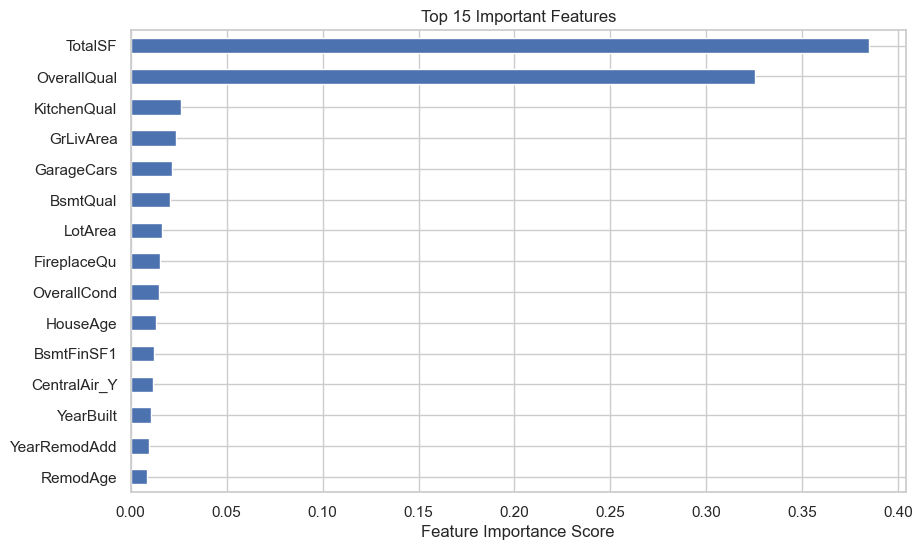

In [43]:
top_features = feature_importance.head(15)

plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh')
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()

## Feature Importance Analysis

The tuned Gradient Boosting model identified `TotalSF` and `OverallQual` as the most influential features in predicting house prices, contributing significantly more than other variables. 
This indicates that overall usable space and construction quality are the primary drivers of house value.

Other features such as kitchen quality, garage capacity, basement quality, lot area, and age-related attributes also contribute to price prediction, but with comparatively smaller influence.

The dominance of `TotalSF` confirms the effectiveness of feature engineering, as combining floor and basement areas provided a stronger predictive signal than individual area features alone. 
Overall, the results reinforce the conclusion that house size and quality are the most critical determinants of sale price.

# Customer Buying Suggestions

- Buyers with limited budgets should prioritize houses with moderate total square footage and average quality ratings. 
Since overall size and construction quality significantly impact price, choosing a house with slightly smaller living space or average finishing quality can result in substantial cost savings.

Additionally, selecting neighborhoods with historically lower price ranges can further reduce purchase cost while maintaining acceptable living standards.

- Families should prioritize houses with higher total square footage and good overall quality ratings, as these factors strongly influence comfort and resale value. 
Features such as a functional basement, adequate garage capacity, and good kitchen quality enhance daily living convenience and long-term property value.

Investing in a well-balanced property with sufficient space and quality construction ensures better long-term returns.

- Premium buyers should focus on properties with high overall quality ratings and larger total square footage, as these features command the highest market value. 
Selecting houses in desirable neighborhoods further enhances property appreciation potential.

High-quality construction combined with strong location advantages maximizes both comfort and long-term investment returns.

- Neighborhood plays a critical role in house pricing. 
Certain neighborhoods consistently show higher price distributions, indicating greater demand and perceived desirability. 
Buyers should balance budget constraints with location preferences, as choosing a slightly less premium area can significantly reduce overall cost.

# Challenges faced & Solutions

Several challenges were encountered during the project:

1. **High Dimensionality**  
   The dataset contained a large number of features, including many categorical variables. 
   After encoding, the number of features increased significantly, making model training more computationally intensive.

2. **Handling Missing Values**  
   Many features contained missing values. 
   A key challenge was distinguishing between true missing data and structural absence (e.g., no basement or no garage). 
   This required careful interpretation before applying appropriate imputation strategies.

3. **Skewed Target Variable**  
   The `SalePrice` variable exhibited strong right skewness, which could negatively impact regression performance. 
   A logarithmic transformation was applied to stabilize variance and improve model learning.

4. **Correlated Features**  
   Certain features, such as garage area and garage capacity, showed high correlation. 
   While not removed, these correlations were carefully evaluated to avoid redundancy-related issues.

5. **Computational Cost of Hyperparameter Tuning**  
   GridSearchCV required evaluating multiple parameter combinations across cross-validation folds, which increased computational time. 
   A balanced parameter grid was selected to ensure efficient and effective tuning.

# Conclusion

This project successfully analyzed and predicted house prices using the Ames Housing dataset. 
Exploratory data analysis revealed that house size, overall construction quality, and neighborhood significantly influence property prices.

Feature engineering enhanced predictive performance by introducing meaningful variables such as total square footage and house age. 
Among the baseline models evaluated, Gradient Boosting Regressor achieved the best performance. 
Further improvement was obtained through hyperparameter tuning using GridSearchCV, resulting in a final model that explains approximately 90% of the variance in house prices.

The final model not only provides accurate price predictions but also offers valuable insights into the key factors that drive housing market trends. 
These findings can assist buyers, sellers, and investors in making informed real estate decisions.

### Future Improvements

Future enhancements could include experimenting with advanced boosting models such as XGBoost or LightGBM, applying advanced feature selection techniques, and incorporating external economic indicators to further improve predictive accuracy.